In [2]:
!pip install qiskit qiskit-ibmq-provider matplotlib pylatexenc qiskit-aer


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
# All imports here.
import qiskit
from qiskit import IBMQ

In [4]:
# Initialise and load the IBM account to access the quantum hardware.
IBMQ.save_account('9228c681cbbec9c39509629102cb2c9f17d63be1e51554a71a09797df15cfb5c45b40805adcb834e9c54116b9484b72bf7dfd7bac15513a6e6a39a57f8aeacac')
IBMQ.load_account()

/tmp/ipykernel_1075570/375977596.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('9228c681cbbec9c39509629102cb2c9f17d63be1e51554a71a09797df15cfb5c45b40805adcb834e9c54116b9484b72bf7dfd7bac15513a6e6a39a57f8aeacac')
/tmp/ipykernel_1075570/375977596.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('9228c681cbbec9c39509629102cb2c9f

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
from qiskit import *



In [6]:
# Implementation of Deutsch's Algorithm.

# First we define the Uf gate
u_f = QuantumCircuit(2, name="u_f")
u_f.x(1)
u_f.cx(0, 1)

u_f.draw(output='mpl')
Uf = u_f.to_gate()


/home/szymon/Documents/quantum-computing/venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


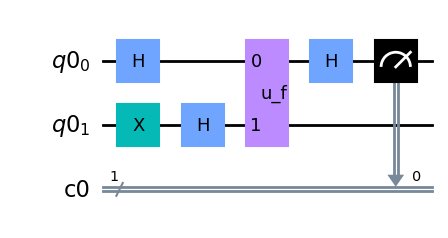

In [7]:
# Now we define the main circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

circuit.x(qr[1])
circuit.h(qr[0])
circuit.h(qr[1])

circuit.append(Uf, [0, 1])

circuit.h(qr[0])

circuit.measure(qr[0], cr[0])
circuit.draw(output='mpl')


/tmp/ipykernel_1075570/334839416.py:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator')
/tmp/ipykernel_1075570/334839416.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, simulator).result()


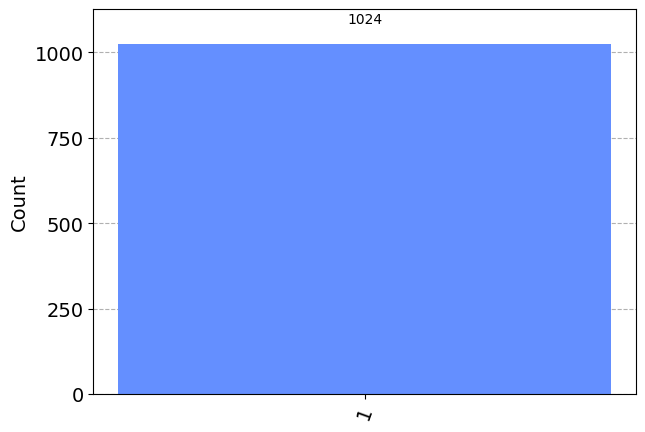

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [15]:
# Here we implement Simon's algorithm

# First the oracle
#Uf = C{q1,q5}C{q1,q4}C{q0,q3}C{q1,q4}C{q2,q5}.

u_f_2 = QuantumCircuit(6, name="u_f_2")
u_f_2.cx(2, 5)
u_f_2.cx(1, 4)
u_f_2.cx(0, 3)
u_f_2.cx(1, 4)
u_f_2.cx(1, 5)

u_f_2.draw(output='mpl')
Uf2 = u_f_2.to_gate()



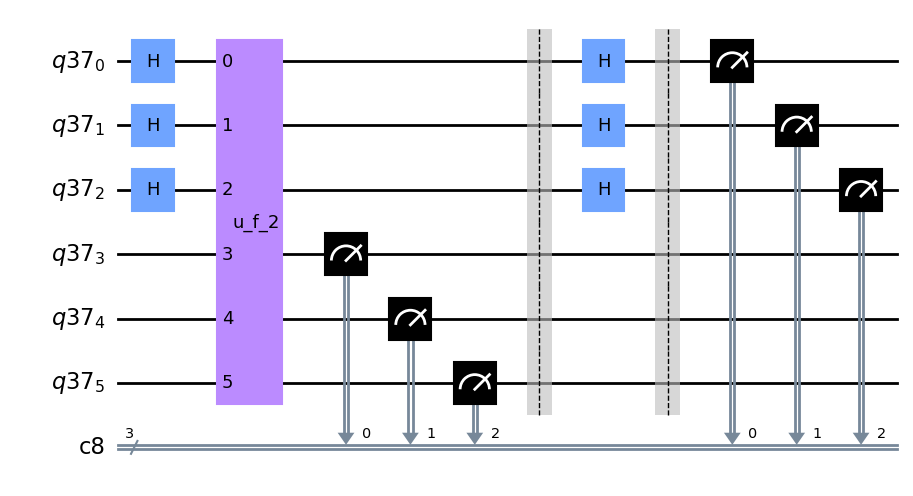

In [25]:

# Now we define the main circuit
qr = QuantumRegister(6)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)

circuit.h([qr[0], qr[1], qr[2]])

circuit.append(Uf2, [0, 1, 2, 3, 4, 5])

circuit.measure([qr[3], qr[4],qr[5]], [cr[0], cr[1],cr[2]])

circuit.barrier()
circuit.h([qr[0], qr[1], qr[2]])
circuit.barrier()

circuit.measure([qr[0], qr[1],qr[2]], [cr[0], cr[1],cr[2]])

circuit.draw(output='mpl')


Result(backend_name='qasm_simulator', backend_version='0.13.3', qobj_id='', job_id='3159257b-85bc-4d78-801b-df18bad5e72a', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x6': 236, '0x1': 256, '0x7': 263, '0x0': 269}), header=QobjExperimentHeader(creg_sizes=[['c8', 3]], global_phase=0.0, memory_slots=3, n_qubits=6, name='circuit-189', qreg_sizes=[['q37', 6]], metadata={}), status=DONE, seed_simulator=129022264, metadata={'time_taken': 0.001454212, 'num_bind_params': 1, 'parallel_state_update': 8, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[5, 5], [4, 4], [3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 6, 'sample_measure_time': 0.00090671, 'active_input_qubits': [0, 1, 2, 3, 4, 5], 'num_clbits': 3, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 31820, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False

/tmp/ipykernel_1075570/1169342358.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, simulator).result()


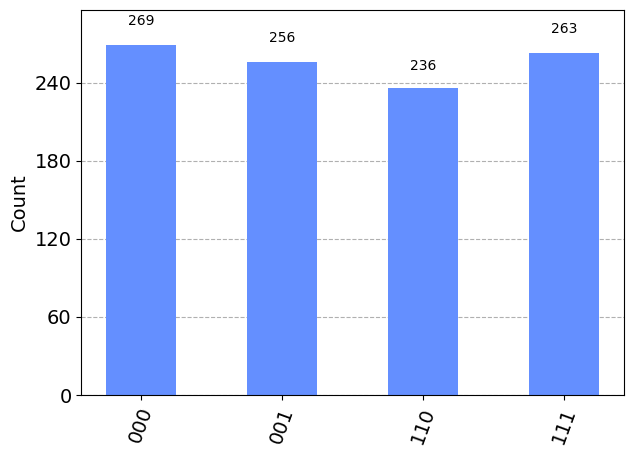

In [26]:
result = execute(circuit, simulator).result()
print(result)
plot_histogram(result.get_counts(circuit))

In [28]:
# Calculate the dot product of the results with the true value of a
# and check that indeed we get all zeros.

a = "110"

def dot_product(a, y):
    acc = 0
    for i in range(len(a)):
        acc += int(a[i]) * int(y[i])
    return (acc % 2)

for y in result.get_counts():
    print( '{}.{} = {} (mod 2)'.format(a, y, dot_product(a,y)) )

110.110 = 0 (mod 2)
110.001 = 0 (mod 2)
110.111 = 0 (mod 2)
110.000 = 0 (mod 2)


In [35]:
# We can find a by elminating all of the configurations that aren't 0 when taken the dot product

possibilities = [f"{x}{y}{z}" for x in [0, 1] for y in [0, 1] for z in [0, 1]]
values = []
for val in possibilities:
    if all([dot_product(val, y) == 0 for y in result.get_counts()]):
        values.append(val)
    

print(possibilities)
print(values)

['000', '001', '010', '011', '100', '101', '110', '111']
['000', '110']


In [ ]:
# We know that 000 is not an option as it needs to be a valid period of the function (non-zero)
# Hence we have found our a.